# ===============================================================
# 1. IMPORTS
# ===============================================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# 2. LOAD DATA

In [2]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\Machine Learning\ml by akki sir\cars24fullclean.csv")


In [3]:
df.head()

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,zero_downpayment,city,state
0,0,Ford Ecosport,Ford,1.5 TITANIUMTDCI OPT,2013,Manual,179045,1,Diesel,507599,11291,Zero downpayment,Hyderabad,Telangana
1,1,Maruti Swift,Maruti,ZDI,2012,Manual,78819,2,Diesel,476699,10604,Zero downpayment,Hyderabad,Telangana
2,2,Honda Mobilio,Honda,1.5 V OPT I DTEC,2014,Manual,97289,2,Diesel,494799,11007,Zero downpayment,Hyderabad,Telangana
3,3,Maruti Wagon R 1.0,Maruti,VXI,2013,Manual,45693,2,Petrol,331999,7385,Zero downpayment,Hyderabad,Telangana
4,4,Hyundai i20 Active,Hyundai,1.2 S,2016,Manual,40586,1,Petrol,620299,13798,Zero downpayment,Hyderabad,Telangana


In [4]:
# Remove useless column
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

print("Shape :", df.shape)
df.head()


Shape : (4490, 13)


,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,zero_downpayment,city,state
0,Ford Ecosport,Ford,1.5 TITANIUMTDCI OPT,2013,Manual,179045,1,Diesel,507599,11291,Zero downpayment,Hyderabad,Telangana
1,Maruti Swift,Maruti,ZDI,2012,Manual,78819,2,Diesel,476699,10604,Zero downpayment,Hyderabad,Telangana
2,Honda Mobilio,Honda,1.5 V OPT I DTEC,2014,Manual,97289,2,Diesel,494799,11007,Zero downpayment,Hyderabad,Telangana
3,Maruti Wagon R 1.0,Maruti,VXI,2013,Manual,45693,2,Petrol,331999,7385,Zero downpayment,Hyderabad,Telangana
4,Hyundai i20 Active,Hyundai,1.2 S,2016,Manual,40586,1,Petrol,620299,13798,Zero downpayment,Hyderabad,Telangana


# 3. BASIC EDA



In [5]:
print("\nNull Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)




Null Values:
 cars_name           0
cars_brand          0
model               0
model_year          0
car_type            0
kms                 0
owner               0
gasoliene_type      0
price               0
emi_per_month       0
zero_downpayment    0
city                0
state               0
dtype: int64

Data Types:
 cars_name           object
cars_brand          object
model               object
model_year           int64
car_type            object
kms                  int64
owner                int64
gasoliene_type      object
price                int64
emi_per_month        int64
zero_downpayment    object
city                object
state               object
dtype: object


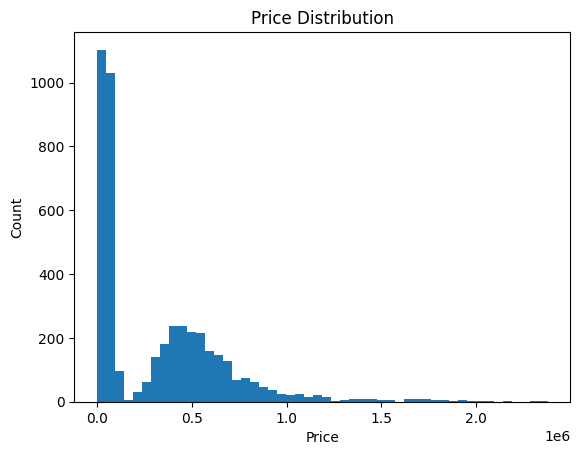

In [6]:
# Price Distribution
plt.hist(df['price'], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [7]:
print(df.columns)


Index(['cars_name', 'cars_brand', 'model', 'model_year', 'car_type', 'kms',
       'owner', 'gasoliene_type', 'price', 'emi_per_month', 'zero_downpayment',
       'city', 'state'],
      dtype='object')


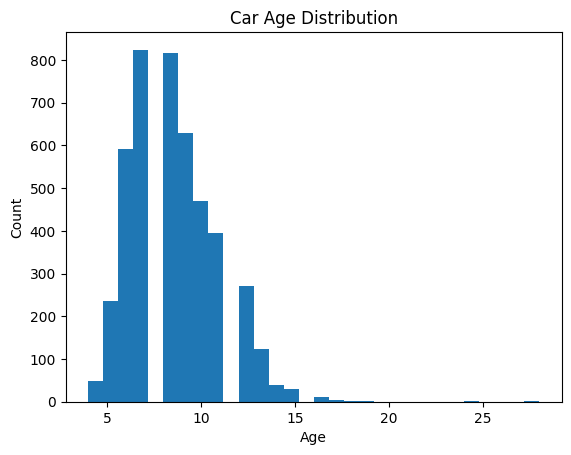

In [8]:
# Car Age
df["Car_Age"] = 2025 - df["model_year"]
plt.hist(df['Car_Age'], bins=30)
plt.title("Car Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

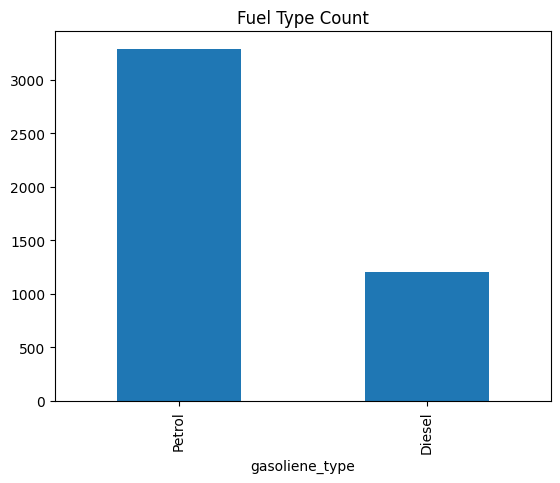

In [9]:
# Fuel Count
df["gasoliene_type"].value_counts().plot(kind="bar")
plt.title("Fuel Type Count")
plt.show()


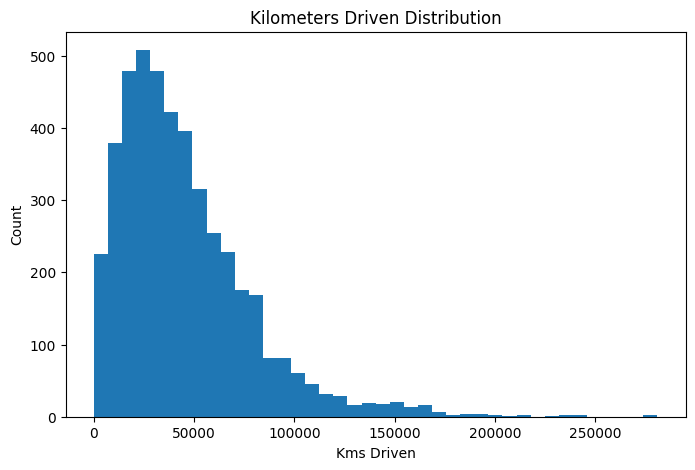

In [10]:
# Kms Driven Distribution
plt.figure(figsize=(8,5))
plt.hist(df["kms"], bins=40)
plt.title("Kilometers Driven Distribution")
plt.xlabel("Kms Driven")
plt.ylabel("Count")
plt.show()


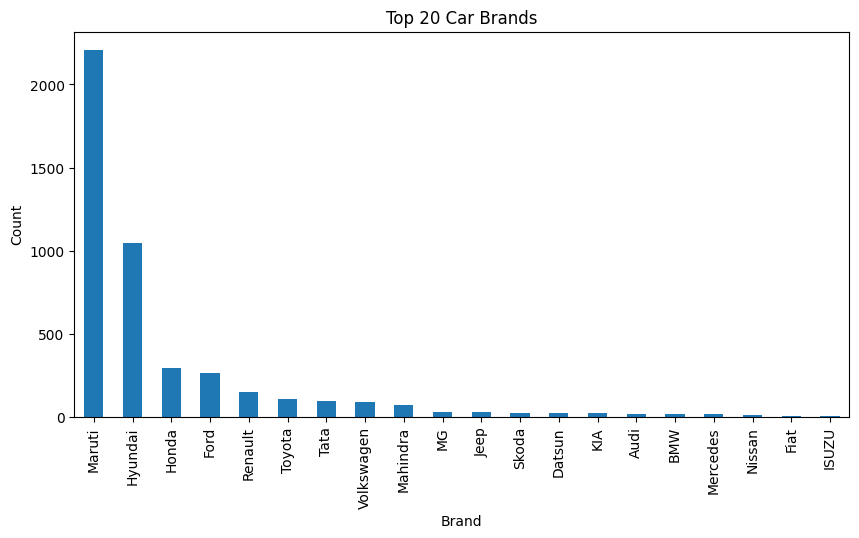

In [11]:
# Brand Count Plot (Categorical)
df["cars_brand"].value_counts().head(20).plot(kind="bar", figsize=(10,5))
plt.title("Top 20 Car Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


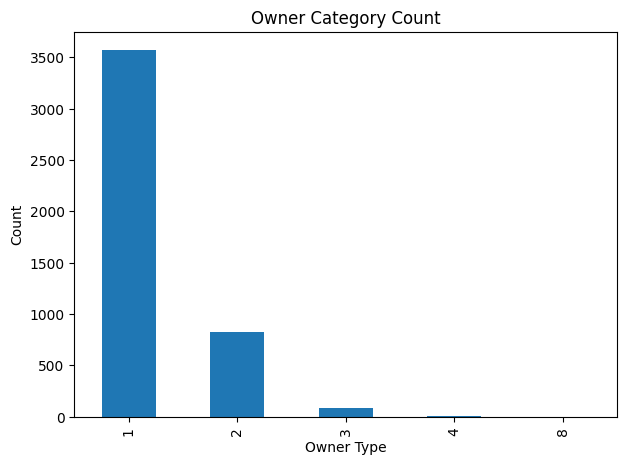

In [12]:
df["owner"].value_counts().plot(kind="bar", figsize=(7,5))
plt.title("Owner Category Count")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()


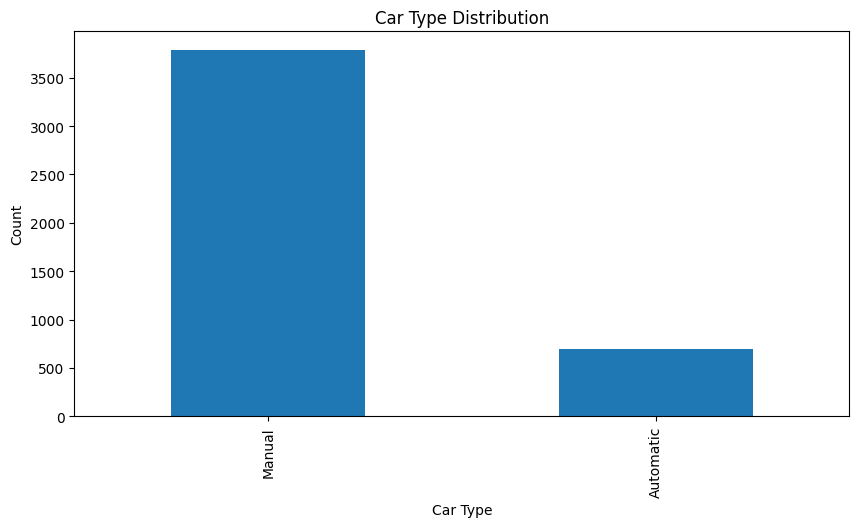

In [13]:
df["car_type"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Car Type Distribution")
plt.xlabel("Car Type")
plt.ylabel("Count")
plt.show()


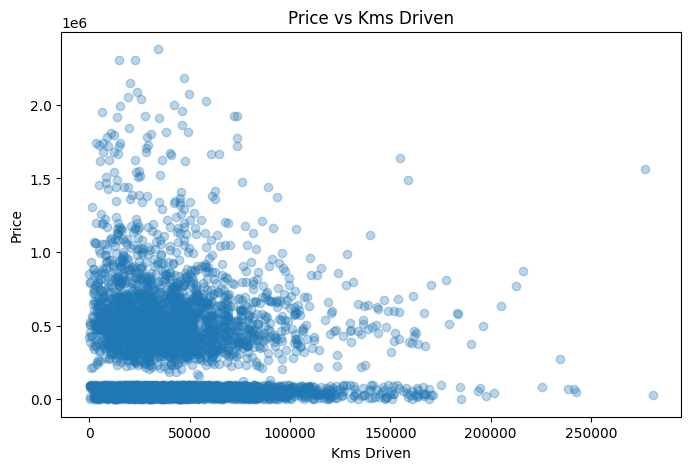

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(df["kms"], df["price"], alpha=0.3)
plt.title("Price vs Kms Driven")
plt.xlabel("Kms Driven")
plt.ylabel("Price")
plt.show()


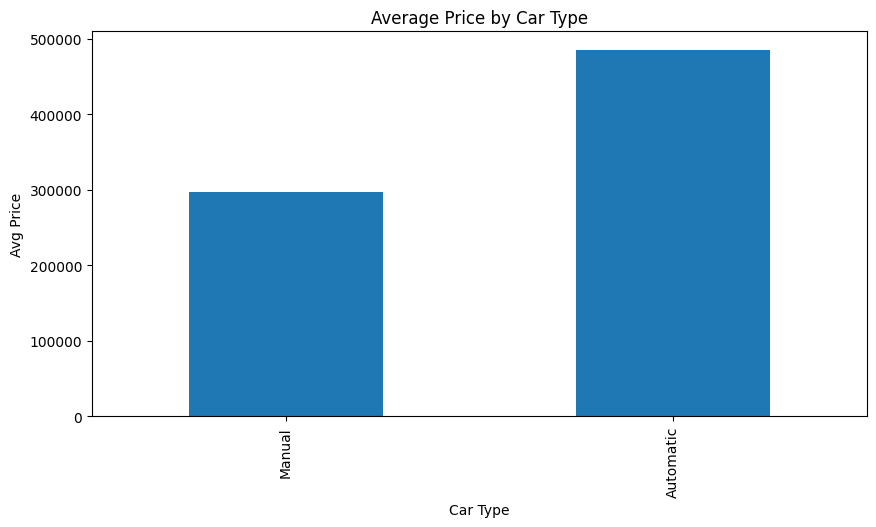

In [15]:
df.groupby("car_type")["price"].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Average Price by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Avg Price")
plt.show()


# ===============================================================
#  Outlier Detection (IQR Method)
# ===============================================================


OUTLIER COUNT (Before Cleaning):
{'model_year': 50, 'kms': 160, 'owner': 921, 'price': 93, 'emi_per_month': 89}


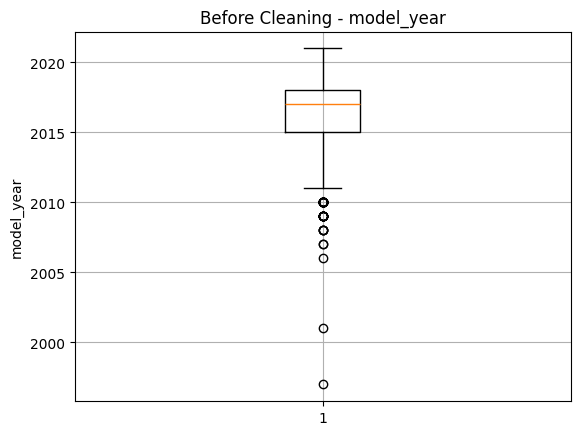

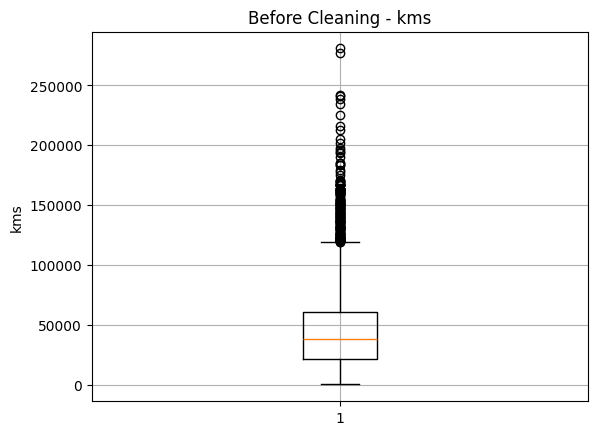

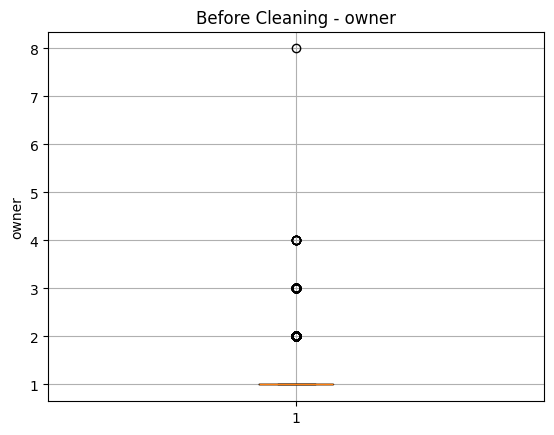

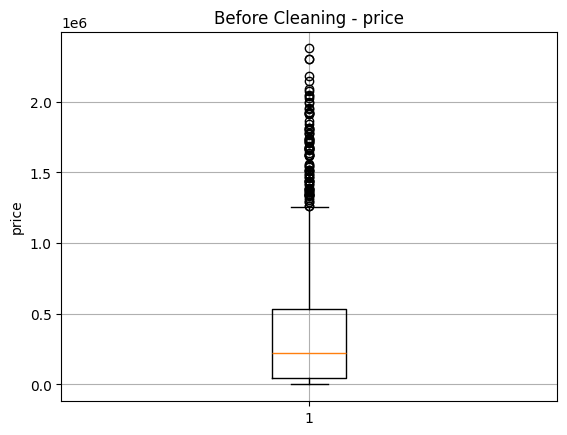

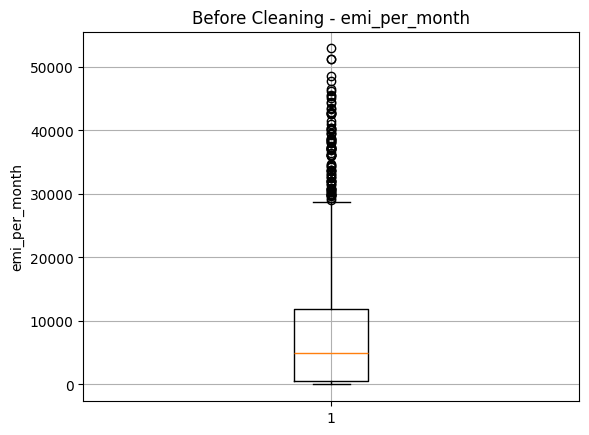

In [16]:
# Numeric columns
numeric_cols = ['model_year','kms','owner','price','emi_per_month']

# Function to calculate outliers using IQR
def outlier_stats(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers.index, lower, upper

# Outlier count report
outlier_report = {}
for col in numeric_cols:
    idx, lower, upper = outlier_stats(df[col])
    outlier_report[col] = len(idx)

print("OUTLIER COUNT (Before Cleaning):")
print(outlier_report)

# BEFORE BOXPLOTS
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Before Cleaning - {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# REMOVE OUTLIERS USING CAPPING
df_clean = df.copy()
for col in numeric_cols:
    idx, lower, upper = outlier_stats(df[col])
    df_clean[col] = df[col].clip(lower=lower, upper=upper)




OUTLIER COUNT (After Cleaning / Capping):
{'model_year': 0, 'kms': 0, 'owner': 0, 'price': 0, 'emi_per_month': 0}


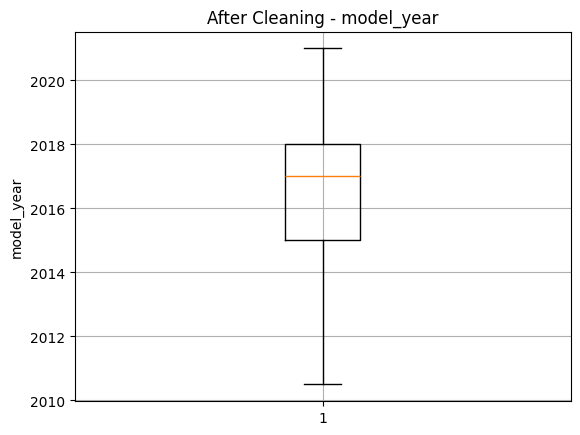

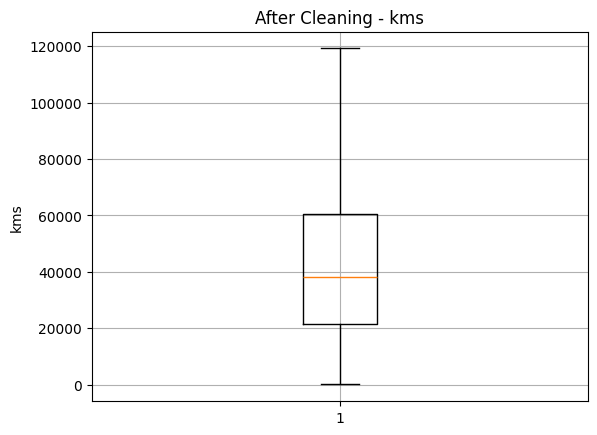

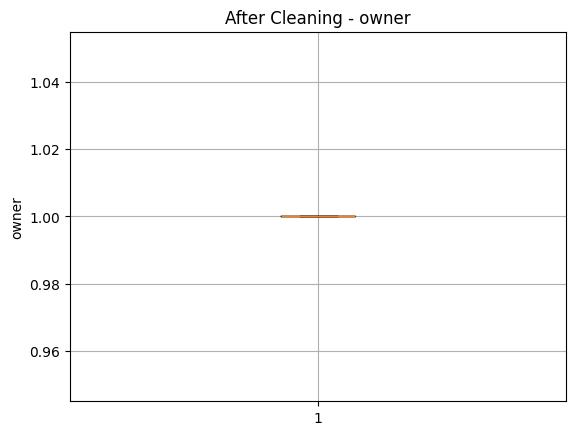

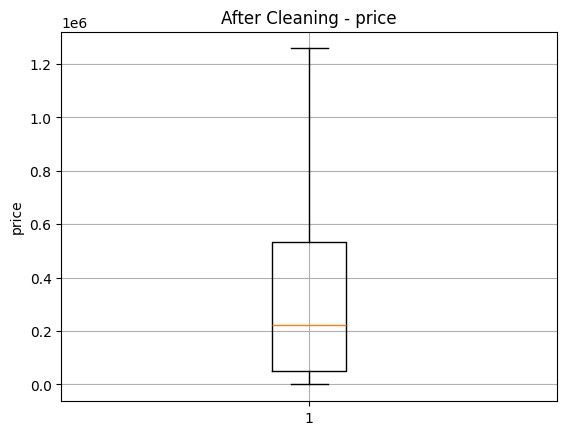

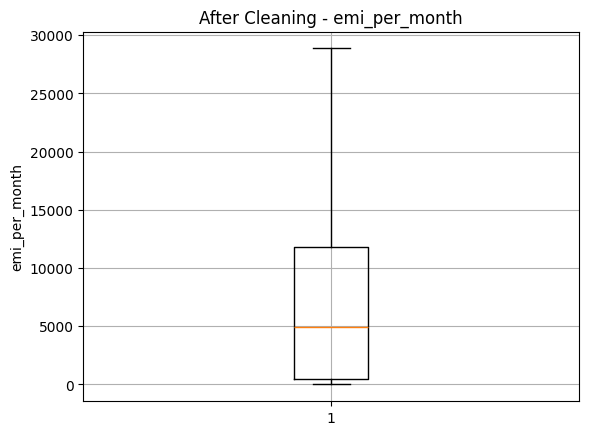

In [17]:
# NEW OUTLIER COUNT AFTER CLEANING
outlier_report_after = {}
for col in numeric_cols:
    idx, lower, upper = outlier_stats(df_clean[col])
    outlier_report_after[col] = len(idx)

print("\nOUTLIER COUNT (After Cleaning / Capping):")
print(outlier_report_after)

# AFTER BOXPLOTS
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df_clean[col])
    plt.title(f"After Cleaning - {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

### drop zero downpayment col because it is not important for this


In [18]:
df = df.drop(columns=['zero_downpayment'])


## encode for cat columns in 0 and 1 

In [19]:
cat_cols = ['cars_name','cars_brand','model','car_type','gasoliene_type','city','state']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Convert True/False to 0/1
df_encoded = df_encoded.astype(int)

df_encoded.head()


,model_year,kms,owner,price,emi_per_month,Car_Age,cars_name_Audi A4,cars_name_Audi A6,cars_name_Audi Q3,cars_name_BMW 3 Series,...,city_Kolkata,city_Mumbai,city_Pune,state_Haryana,state_Karnataka,state_Maharashtra,state_Rajasthan,state_Tamilnadu,state_Telangana,state_West Bengal
0,2013,179045,1,507599,11291,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2012,78819,2,476699,10604,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2014,97289,2,494799,11007,11,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2013,45693,2,331999,7385,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016,40586,1,620299,13798,9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df_encoded.head()

,model_year,kms,owner,price,emi_per_month,Car_Age,cars_name_Audi A4,cars_name_Audi A6,cars_name_Audi Q3,cars_name_BMW 3 Series,...,city_Kolkata,city_Mumbai,city_Pune,state_Haryana,state_Karnataka,state_Maharashtra,state_Rajasthan,state_Tamilnadu,state_Telangana,state_West Bengal
0,2013,179045,1,507599,11291,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2012,78819,2,476699,10604,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2014,97289,2,494799,11007,11,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2013,45693,2,331999,7385,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016,40586,1,620299,13798,9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Target column (price)
y = df_encoded['price']
X = df_encoded.drop(columns=['price'])


## Train test split

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
# Scaling (only numerical columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=200),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [25]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = r2_score(y_test, pred)
    results[name] = acc

results

{'Linear Regression': 0.9952272150143436,
 'Decision Tree': 0.9938124768280726,
 'Random Forest': 0.9965271224122527,
 'KNN': 0.5215647405907275,
 'Gradient Boosting': 0.9963215397775104}

In [26]:
for model, score in results.items():
    print(f"{model}: {score:.4f}")


Linear Regression: 0.9952
Decision Tree: 0.9938
Random Forest: 0.9965
KNN: 0.5216
Gradient Boosting: 0.9963


In [27]:
df['cars_brand'] = df['cars_brand'].astype(str)
df['model'] = df['model'].astype(str)
df['car_type'] = df['car_type'].astype(str)
df['gasoliene_type'] = df['gasoliene_type'].astype(str)
df['city'] = df['city'].astype(str)
df['state'] = df['state'].astype(str)


In [42]:
def search_car():
    brand = input("Brand (optional): ").strip().lower()
    model = input("Car Name/Model (optional): ").strip().lower()

    # Ensure columns are strings
    df['cars_brand'] = df['cars_brand'].astype(str)
    df['cars_name'] = df['cars_name'].astype(str)

    # Start with all rows 
    result = df.copy()

    # Filter by brand if provided
    if brand != "":
        result = result[result['cars_brand'].str.lower().str.contains(brand)]

    # Filter by model/car name if provided
    if model != "":
        result = result[result['cars_name'].str.lower().str.contains(model)]

    # If no match
    if result.empty:
        print("⚠ Koi matching car nahi mili!")
    else:
        print("\n----- MATCHING CAR DETAILS -----\n")
        return result

        result
# Run the function
search_car()


Brand (optional):  bmw
Car Name/Model (optional):  



----- MATCHING CAR DETAILS -----



,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,city,state,Car_Age
1736,BMW 5 Series,BMW,520D 2.0,2012,Automatic,79585,1,Diesel,85999,606,Gurgaon,Haryana,13
1892,BMW 5 Series,BMW,520D LUXURY LINE,2013,Automatic,46477,1,Diesel,43699,12,Gurgaon,Haryana,12
1895,BMW 5 Series,BMW,520D LUXURY LINE,2013,Automatic,82593,2,Diesel,23899,123,Gurgaon,Haryana,12
2164,BMW X3,BMW,XDRIVE 20D,2013,Automatic,69697,2,Diesel,57499,972,Gurgaon,Haryana,12
2172,BMW X1,BMW,SDRIVE 20D,2017,Automatic,47517,1,Diesel,15799,616,Gurgaon,Haryana,8
2177,BMW 3 Series,BMW,320D,2015,Automatic,34232,2,Diesel,80099,148,Gurgaon,Haryana,10
2410,BMW 5 Series,BMW,520D LUXURY LINE,2015,Automatic,80744,2,Diesel,43799,463,Gurgaon,Haryana,10
3184,BMW 3 Series,BMW,320D,2012,Automatic,23782,2,Diesel,1200000,26693,Kolkata,West Bengal,13
3277,BMW 5 Series,BMW,520D 2.0,2013,Automatic,93457,2,Diesel,1376799,30626,Mumbai,Maharashtra,12
3360,BMW 3 Series,BMW,320D SPORTLINE,2014,Automatic,76122,1,Diesel,1473799,32784,Mumbai,Maharashtra,11
